*Question No 1*:

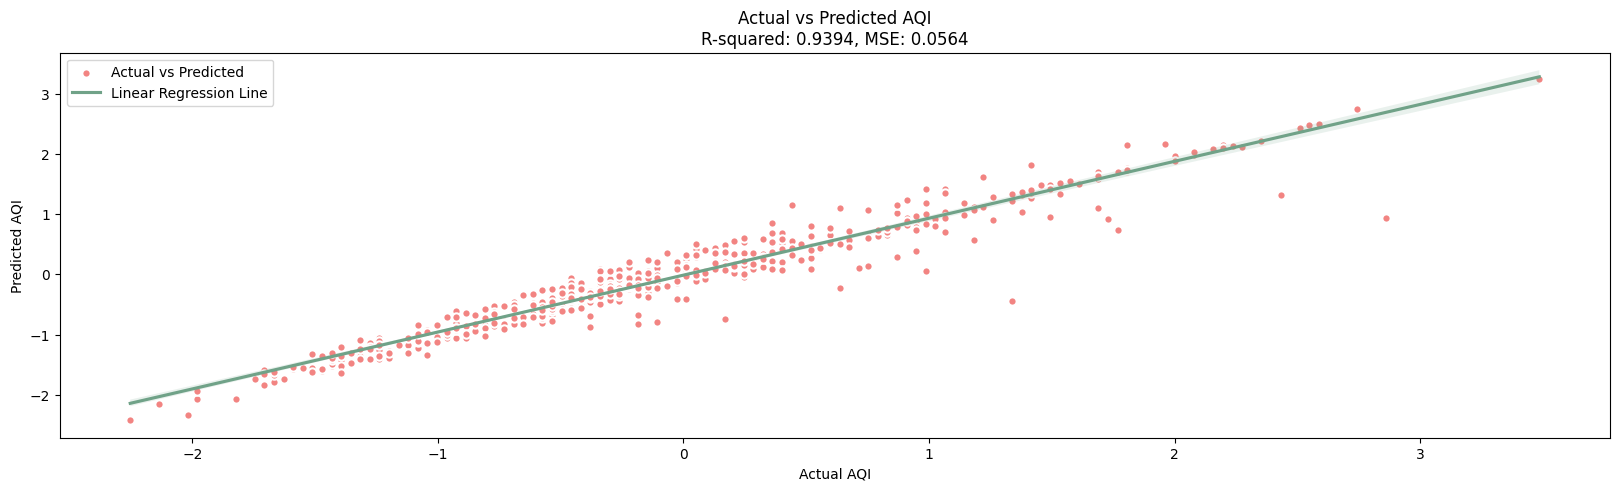

R-squared (R2): 0.9394
Mean Squared Error (MSE): 0.0564


In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

# Reading the CSV file
df = pd.read_csv('daily_air.csv')

# Selecting Dependent and Independent Variables
independent_features = ['CO', 'O3', 'NO2', 'SO2', 'PM10', 'PM2.5']
dependent_feature = 'AQI'

X = df[independent_features]
y = df[dependent_feature]

# Scaling the data
scaler_X = StandardScaler()
X_scaled = scaler_X.fit_transform(X)

scaler_y = StandardScaler()
y_scaled = scaler_y.fit_transform(y.values.reshape(-1, 1)).flatten()

# Splitting the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, test_size=0.3, random_state=38)

# Creating a Ridge regression model
ridge_model = Ridge(alpha=.001) 

# Training the Ridge model
ridge_model.fit(X_train, y_train)

# Making predictions on the test set
y_pred = ridge_model.predict(X_test)

# Calculating R2
r2 = r2_score(y_test, y_pred)

# Calculating Mean Squared Error
mse = mean_squared_error(y_test, y_pred)

# Plotting the actual vs predicted values with a linear regression line
plt.figure(figsize=(20, 5))

# Scatter plot of actual vs predicted values
sns.scatterplot(x=y_test, y=y_pred, color='#F28482', label='Actual vs Predicted', linewidth=1.5, marker='o')

# Linear regression line
sns.regplot(x=y_test, y=y_pred, scatter=False, color='#70A288', label='Linear Regression Line')

plt.xlabel('Actual AQI')
plt.ylabel('Predicted AQI')
plt.title(f'Actual vs Predicted AQI\nR-squared: {r2:.4f}, MSE: {mse:.4f}')
plt.legend()
plt.show()

print(f'R-squared (R2): {r2:.4f}')
print(f'Mean Squared Error (MSE): {mse:.4f}')


*Question No 2*:

In [5]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report

# Loading the dataset
df = pd.read_csv('penguins.csv')

# Droping rows with missing values for simplicity
df = df.dropna()

# Encoding categorical variables
le = LabelEncoder()
df['island'] = le.fit_transform(df['island'])
df['sex'] = le.fit_transform(df['sex'])
df['species'] = le.fit_transform(df['species'])

# Spliting the data into features and target variable
X = df.drop('species', axis=1)
y = df['species']

# Spliting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Building a RandomForestClassifier model
clf = RandomForestClassifier(n_estimators=100, random_state=32)
clf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = clf.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')

print(f'Accuracy: {accuracy:.2f}')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')

# Display the detailed classification report
print('\nClassification Report:')
print(classification_report(y_test, y_pred, target_names=le.classes_))

Accuracy: 1.00
Precision: 1.00
Recall: 1.00

Classification Report:
              precision    recall  f1-score   support

      Adelie       1.00      1.00      1.00        31
   Chinstrap       1.00      1.00      1.00        13
      Gentoo       1.00      1.00      1.00        23

    accuracy                           1.00        67
   macro avg       1.00      1.00      1.00        67
weighted avg       1.00      1.00      1.00        67



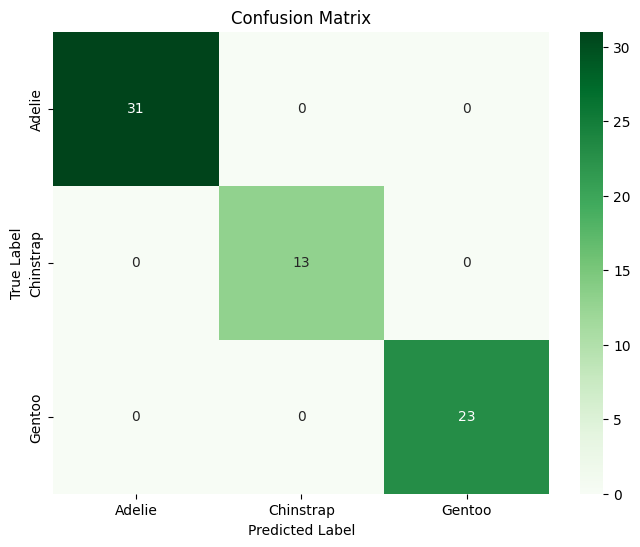

Classification Report:
               precision    recall  f1-score   support

      Adelie       1.00      1.00      1.00        31
   Chinstrap       1.00      1.00      1.00        13
      Gentoo       1.00      1.00      1.00        23

    accuracy                           1.00        67
   macro avg       1.00      1.00      1.00        67
weighted avg       1.00      1.00      1.00        67



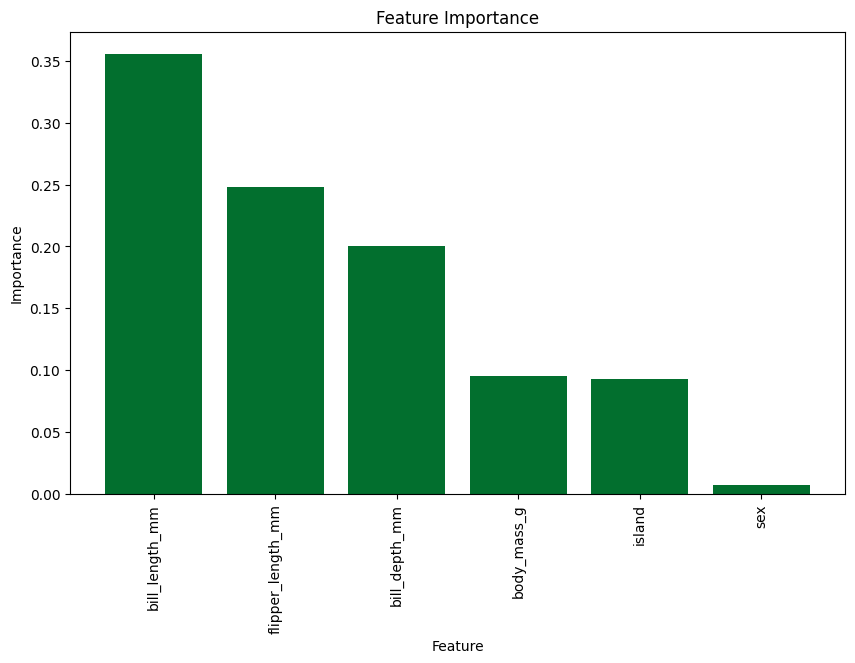

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report

# Confusion Matrix

conf_mat = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Greens', xticklabels=le.classes_, yticklabels=le.classes_)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Displaying additional metrics
report = classification_report(y_test, y_pred, target_names=le.classes_)
print('Classification Report:\n', report)

plt.show()

# Feature Importance
feature_importance = clf.feature_importances_
feature_names = X.columns

# Sorting feature importances in descending order
indices = feature_importance.argsort()[::-1]

plt.figure(figsize=(10, 6))
plt.bar(range(X.shape[1]), feature_importance[indices] , align='center', color='#026f2e')
plt.xticks(range(X.shape[1]), feature_names[indices], rotation=90)
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Feature Importance')
plt.show()